## 5.8 决策树与随机森林
> 随机森林是一种集成方法，通过集成多个比较简单的评估器形成累积效果。这种集成方法的学习效果经常出人意料，<br>往往能超过各个组成部分的总和，也就是说，若干评估器的多数投票的最终效果往往优于单个评估器投票的效果。

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()


### 5.8.1 随机森林的诱因：决策树
> 决策树采用非常直观地方式对事物进行分类或打标签。

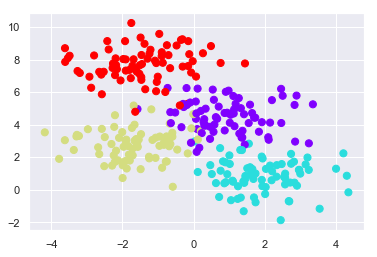

In [3]:
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=300,centers=4,random_state=0,cluster_std=1.0)
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='rainbow')
#决策树方法不断将数据的一个特征或另一个特征按照某种判定条件进行分割，
#每分割一次都将新区域内点的多数投票结果标签分配到该区域上

C:\Users\WinJX\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\WinJX\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\WinJX\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\WinJX\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


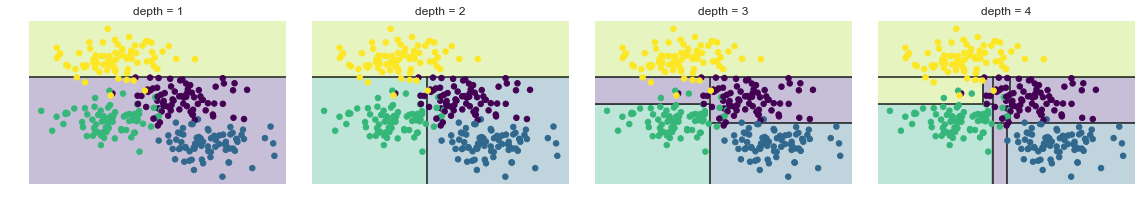

In [4]:
from helpers_05_08 import visualize_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs

        
fig, ax = plt.subplots(1, 4, figsize=(16, 3))
fig.subplots_adjust(left=0.02, right=0.98, wspace=0.1)

X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=1.0)

for axi, depth in zip(ax, range(1, 5)):
    model = DecisionTreeClassifier(max_depth=depth)
    visualize_tree(model, X, y, ax=axi)
    axi.set_title('depth = {0}'.format(depth))

> 决策树对数据前四次分割的可视化结果。

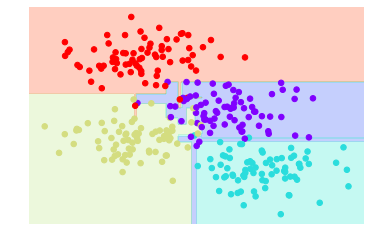

In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X,y)

#可视化决策树分类结果
def visualize_classifier(model,X,y,ax=None,cmap='rainbow'):
    ax = ax or plt.gca()
    ax.scatter(X[:,0],X[:,1],c=y,s=30,cmap=cmap,zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    model.fit(X,y)
    xx,yy = np.meshgrid(np.linspace(*xlim,num=200),
                        np.linspace(*ylim,num=200))
    Z = model.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx,yy,Z,alpha=0.3,levels=np.arange(n_classes+1)-0.5,
                           cmap=cmap,zorder=1)
    ax.set(xlim=xlim,ylim=ylim)

visualize_classifier(DecisionTreeClassifier(),X,y)
#决策树分类结果

In [6]:
import helpers_05_08
helpers_05_08.plot_tree_interactive(X,y)

interactive(children=(Dropdown(description='depth', index=1, options=(1, 5), value=5), Output()), _dom_classes…

<function helpers_05_08.plot_tree_interactive.<locals>.interactive_tree(depth=5)>

C:\Users\WinJX\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)
C:\Users\WinJX\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


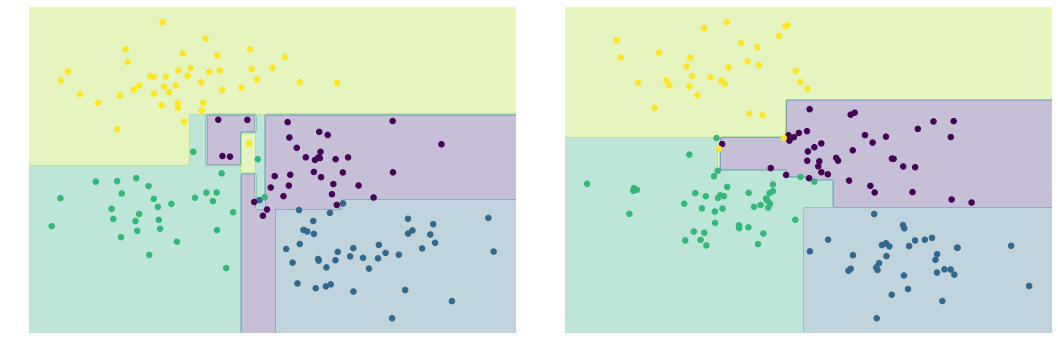

In [7]:
#2:决策树与过拟合
model = DecisionTreeClassifier()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
visualize_tree(model, X[::2], y[::2], boundaries=False, ax=ax[0])
visualize_tree(model, X[1::2], y[1::2], boundaries=False, ax=ax[1])

> 决策树非常容易陷得很深，往往会拟合局部数据，而没有对整个数据分布的大局观。<br>上图是训练两棵不同的决策树，每棵树拟合一半数据。可见在一些区域产生了一致的结果，<br>将两棵树的结果组合起来可能会获得更好的结果

In [8]:
helpers_05_08.randomized_tree_interactive(X,y)

interactive(children=(Dropdown(description='random_state', options=(0, 100), value=0), Output()), _dom_classes…

---
### 5.8.2 随机森林
> 通过组合多个过拟合评估器来降低过拟合程度的想法是一种集成学习方法，称为装袋算法。<br>
装袋算法使用并行估计器对数据进行有放回抽取集成，每个评估器都对数据过拟合，通过求均值可以获得更好的分类结果.<br>
随机决策树的集成算法就是随机森林

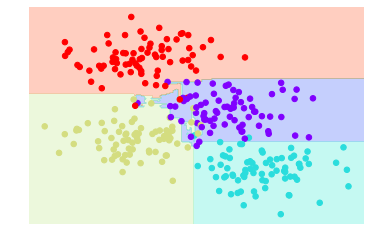

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree,n_estimators=100,max_samples=0.8,random_state=1)
visualize_classifier(bag,X,y)
#让每个评估器拟合样本80%的随机数

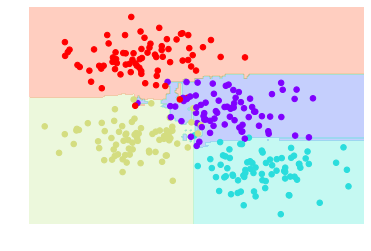

In [10]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,random_state=0)
visualize_classifier(model,X,y)

### 5.8.3 随机森林回归


<ErrorbarContainer object of 3 artists>

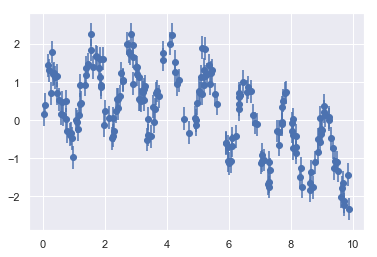

In [11]:
rng = np.random.RandomState(42)
x = 10*rng.rand(200)

def model(x,sigma=0.3):
    fast_oscillation = np.sin(5*x)
    slow_oscillation = np.sin(0.5*x)
    noise = sigma*rng.randn(len(x))
    return slow_oscillation+fast_oscillation+noise

y = model(x)
plt.errorbar(x,y,0.3,fmt='o')

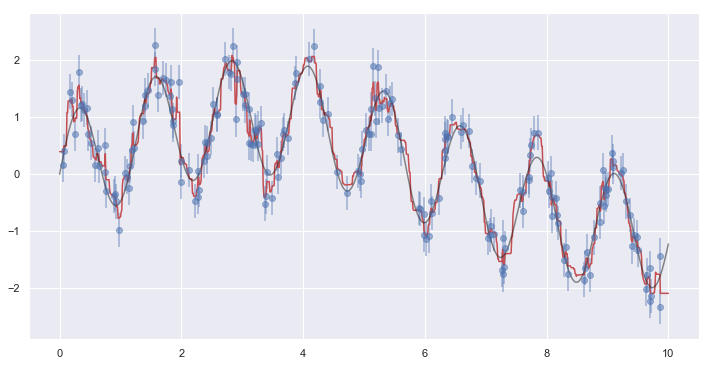

In [12]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(200)
forest.fit(x[:,None],y)
xfit = np.linspace(0,10,1000)
yfit = forest.predict(xfit[:,None])
ytrue = model(xfit,sigma=0)
plt.figure(figsize=(12,6))
plt.errorbar(x,y,0.3,fmt='o',alpha=0.5)
plt.plot(xfit,yfit,'-r')
plt.plot(xfit,ytrue,'k',alpha=0.5)

### 5.8.4 随机森林识别手写数字

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

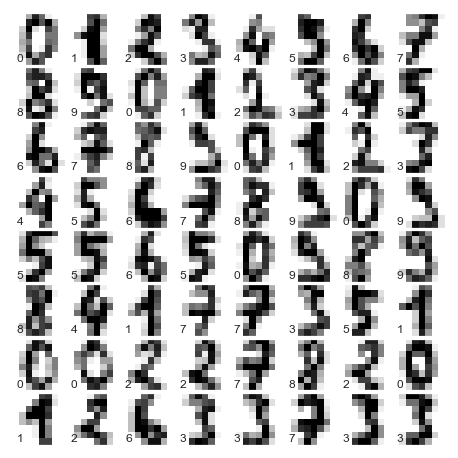

In [17]:
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(left=0,right=1,bottom=0,top=1,hspace=0.05,wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8,8,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i],cmap=plt.cm.binary,interpolation='nearest')
    ax.text(0,7,str(digits.target[i]))

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.95      0.98      0.97        43
           2       1.00      0.95      0.98        44
           3       0.98      0.98      0.98        45
           4       1.00      0.97      0.99        38
           5       0.96      0.98      0.97        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.94      0.96        48
           9       0.98      0.98      0.98        47

   micro avg       0.98      0.98      0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Text(89.18, 0.5, 'predicted label')

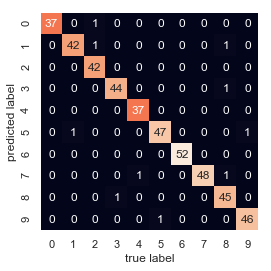

In [20]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

> * 因为决策树的原理很简单，所以它的训练和预测速度都非常快。而且多任务可以直接并行计算，因为每棵树都是完全独立的。<br>
* 多棵树可以进行概率分类：多个评估器之间的多数投票可以给出概率的估计值
* 无参数模型很灵活，在其中评估器都欠拟合的任务中表现突出
* 主要缺点是结果不太容易解释 